<a href="https://colab.research.google.com/github/DevilNReality/Property-Price-Prediction-Imarticus/blob/main/Code%20File/%20Property%20Price%20Prediction%20Imarticus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach To The Problem


1. Load the data and libraries
2.  Data Preparation and Transformation
3.  Visualization
4.   Analysis
  1.  Uni-Variate
  2.  Bi-Variate
  3.  Multi-Variate
5. Model Selection
  1. Supervised
    1. Classification: Y is discrete (0/1)
    2. Regression: Y is continuous
  2. Unsupervised
6. Decision Tree
7. Random Forest
8. Evaluation on Test Dataset


# Load Libraries and Dataset

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
# Decision Tree And Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
# PCA Libraries
from sklearn.decomposition import PCA

In [124]:
dataset = pd.read_csv('/content/HousePrices.csv')

In [125]:
dataset.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

# Data Preparation

In [127]:
numerical_columns = dataset.select_dtypes(include=[np.number])
numerical_columns.columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [128]:
def data_prep(data):
  #Removing Columns With High Missing Values And Low Correlation
  data.drop(['Id','Dwell_Type','PoolArea','ScreenPorch','3SsnPorch',
             'EnclosedPorch','KitchenAbvGr','BsmtHalfBath','LowQualFinSF',
             'OverallCond','BsmtFinSF2','PoolQC','YrSold','MoSold','MiscVal',
             'MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)


  # Converting NaN to None
  for column in data.columns[data.isnull().any()]:
    if data[column].dtype =='object':
      mode = data[column].mode().iloc[0]
      data[column].fillna(mode,inplace=True)
    elif data[column].dtype=='float':
      median = data[column].median()
      data[column].fillna(median,inplace=True)

  return data



In [129]:
data_prep(dataset)

,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,Property_Sale_Price
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,836,TA,TA,Y,192,84,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,RL,70.0,8755,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,...,2,390,TA,TA,Y,0,0,WD,Normal,214000
2069,RL,63.0,7711,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,TA,TA,N,321,0,Oth,Abnorml,150000
2070,RL,313.0,25000,Pave,Reg,Low,AllPub,Inside,Gtl,Mitchel,...,2,576,TA,TA,P,0,0,WD,Normal,143000
2071,RL,52.0,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,...,2,525,TA,TA,Y,0,118,COD,Abnorml,137500


In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zone_Class           2073 non-null   object 
 1   LotFrontage          2073 non-null   float64
 2   LotArea              2073 non-null   int64  
 3   Road_Type            2073 non-null   object 
 4   Property_Shape       2073 non-null   object 
 5   LandContour          2073 non-null   object 
 6   Utilities            2073 non-null   object 
 7   LotConfig            2073 non-null   object 
 8   LandSlope            2073 non-null   object 
 9   Neighborhood         2073 non-null   object 
 10  Condition1           2073 non-null   object 
 11  Condition2           2073 non-null   object 
 12  Dwelling_Type        2073 non-null   object 
 13  HouseStyle           2073 non-null   object 
 14  OverallQual          2073 non-null   int64  
 15  YearBuilt            2073 non-null   i

# Encoding


In [131]:
le =LabelEncoder()

for column in dataset.columns:
    if dataset[column].dtype=='object':
        dataset[column] = le.fit_transform(dataset[column])

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zone_Class           2073 non-null   int64  
 1   LotFrontage          2073 non-null   float64
 2   LotArea              2073 non-null   int64  
 3   Road_Type            2073 non-null   int64  
 4   Property_Shape       2073 non-null   int64  
 5   LandContour          2073 non-null   int64  
 6   Utilities            2073 non-null   int64  
 7   LotConfig            2073 non-null   int64  
 8   LandSlope            2073 non-null   int64  
 9   Neighborhood         2073 non-null   int64  
 10  Condition1           2073 non-null   int64  
 11  Condition2           2073 non-null   int64  
 12  Dwelling_Type        2073 non-null   int64  
 13  HouseStyle           2073 non-null   int64  
 14  OverallQual          2073 non-null   int64  
 15  YearBuilt            2073 non-null   i

# Exploratory Data Analysis

## Uni-Variate Analysis

In [133]:
numerical_columns.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [134]:
numerical_columns.skew()

Id                     -0.033712
Dwell_Type             40.872292
LotFrontage             3.448015
LotArea                11.239413
OverallQual             0.196350
OverallCond             0.649335
YearBuilt              -0.516261
YearRemodAdd           -0.579862
MasVnrArea              2.576900
BsmtFinSF1              1.468890
BsmtFinSF2              4.027937
BsmtUnfSF               0.924212
TotalBsmtSF             1.156452
1stFlrSF                1.247346
2ndFlrSF                0.808616
LowQualFinSF            8.652420
GrLivArea               1.169644
BsmtFullBath            0.619665
BsmtHalfBath            4.169617
FullBath               -0.045613
HalfBath                0.674001
BedroomAbvGr            0.123019
KitchenAbvGr            4.312676
TotRmsAbvGrd            0.721687
Fireplaces              0.625415
GarageYrBlt            -0.700172
GarageCars             -0.373705
GarageArea              0.135391
WoodDeckSF              1.763668
OpenPorchSF             2.257522
EnclosedPo

<ipython-input-135-905bf6b85884>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


<Figure size 500x500 with 0 Axes>

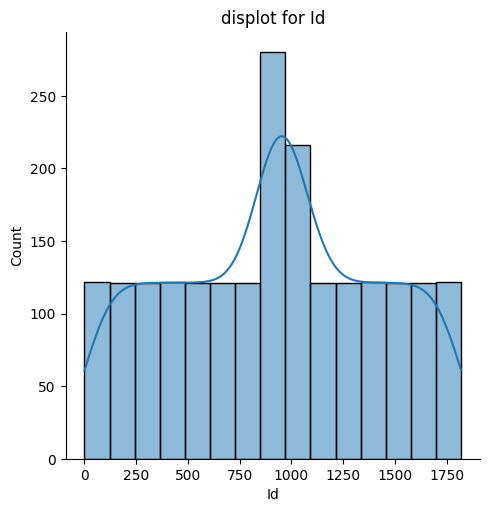

<Figure size 500x500 with 0 Axes>

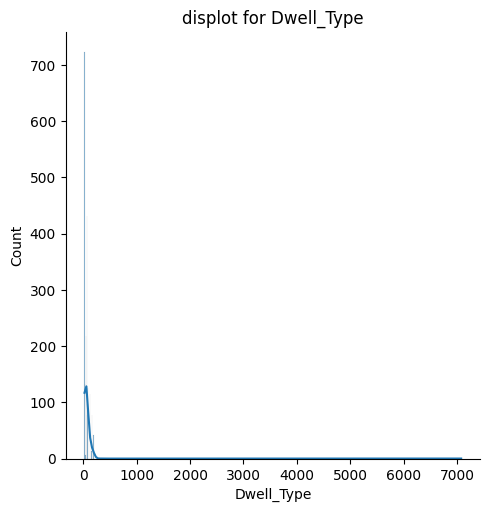

<Figure size 500x500 with 0 Axes>

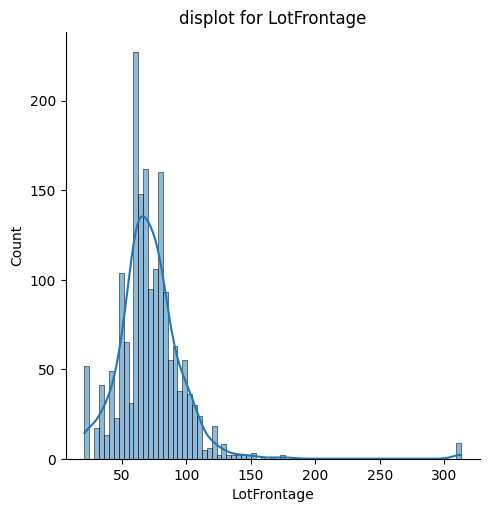

<Figure size 500x500 with 0 Axes>

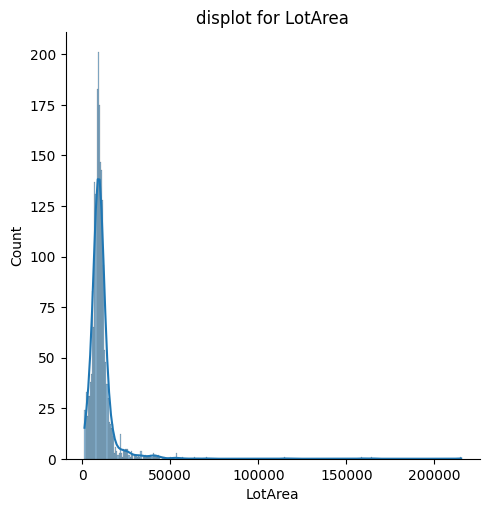

<Figure size 500x500 with 0 Axes>

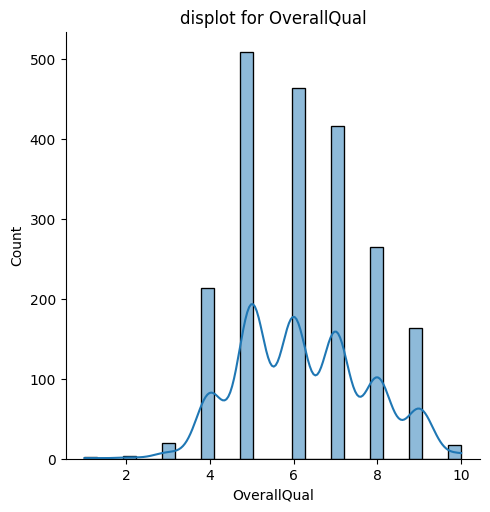

<Figure size 500x500 with 0 Axes>

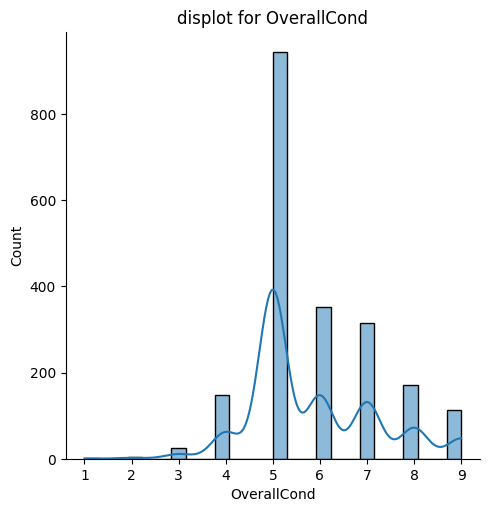

<Figure size 500x500 with 0 Axes>

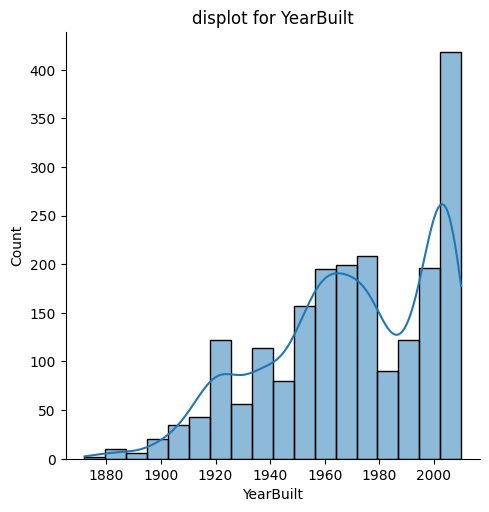

<Figure size 500x500 with 0 Axes>

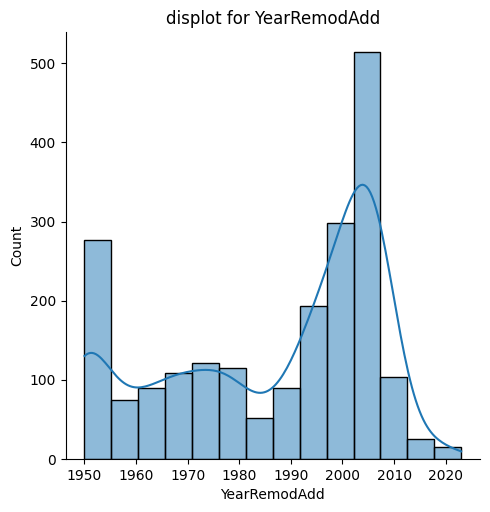

<Figure size 500x500 with 0 Axes>

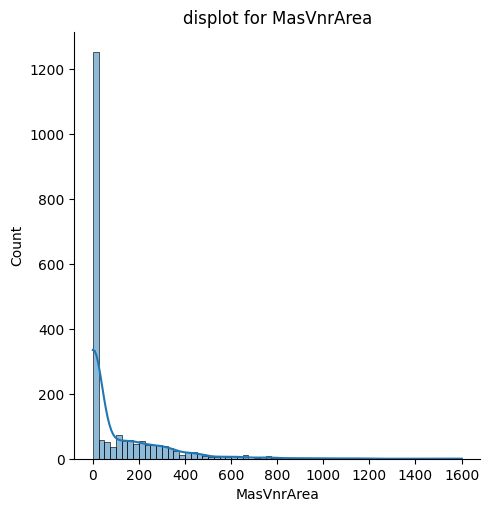

<Figure size 500x500 with 0 Axes>

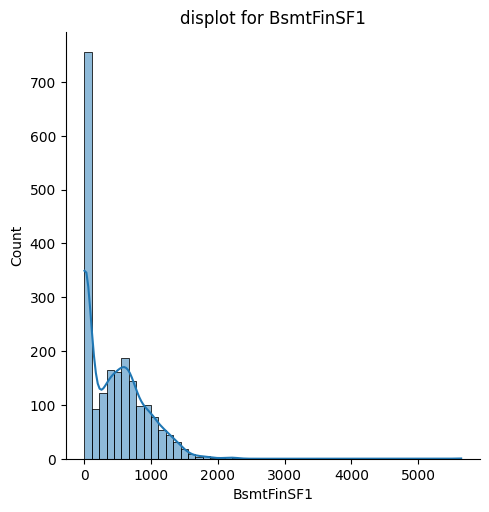

<Figure size 500x500 with 0 Axes>

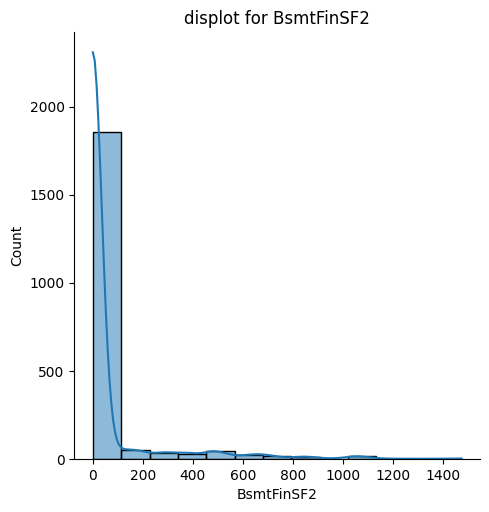

<Figure size 500x500 with 0 Axes>

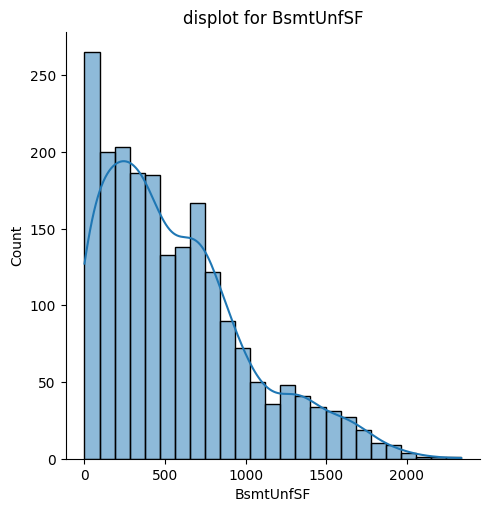

<Figure size 500x500 with 0 Axes>

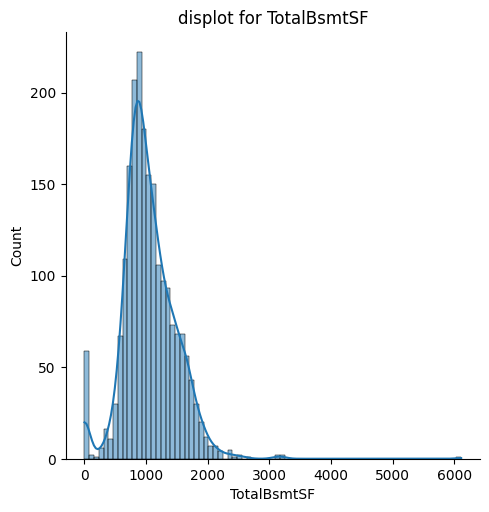

<Figure size 500x500 with 0 Axes>

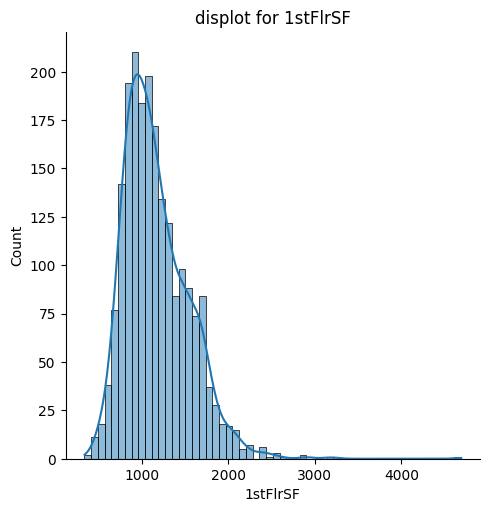

<Figure size 500x500 with 0 Axes>

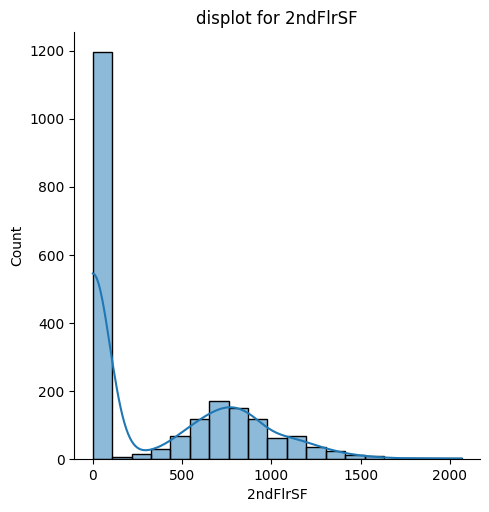

<Figure size 500x500 with 0 Axes>

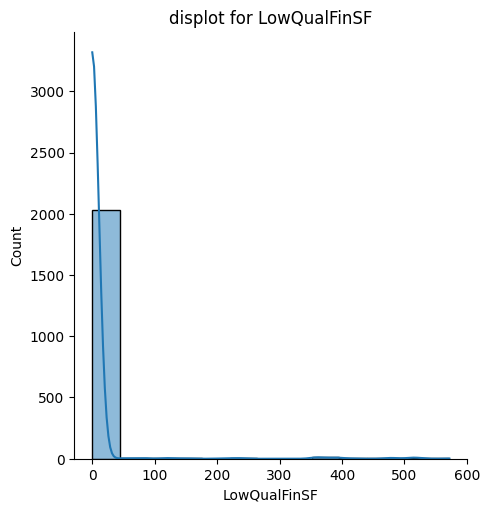

<Figure size 500x500 with 0 Axes>

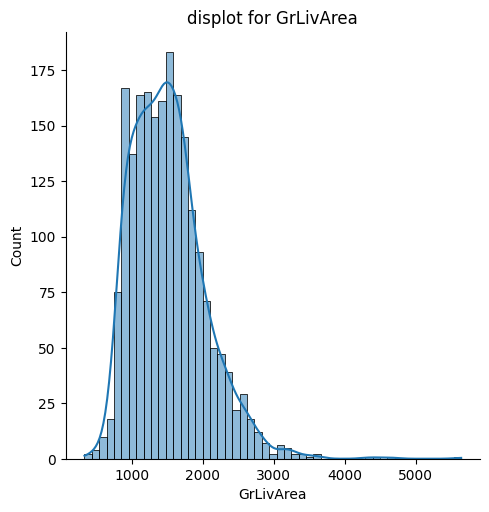

<Figure size 500x500 with 0 Axes>

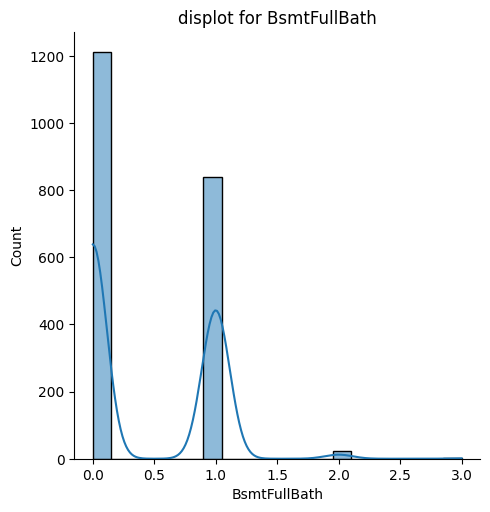

<Figure size 500x500 with 0 Axes>

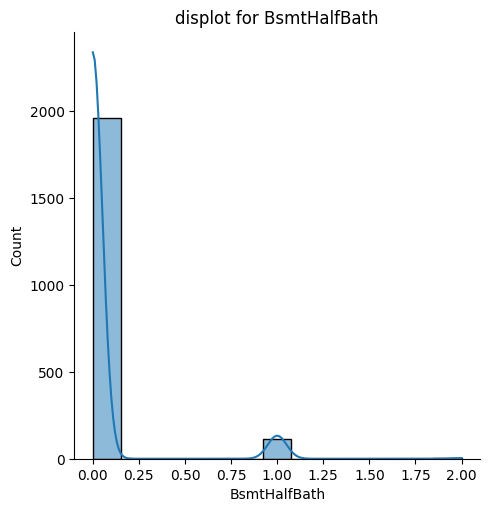

<Figure size 500x500 with 0 Axes>

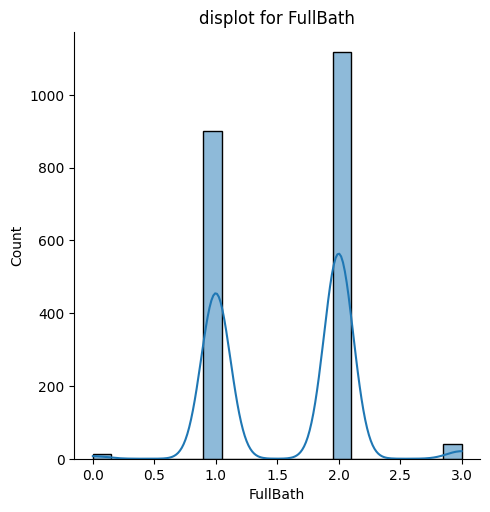

<Figure size 500x500 with 0 Axes>

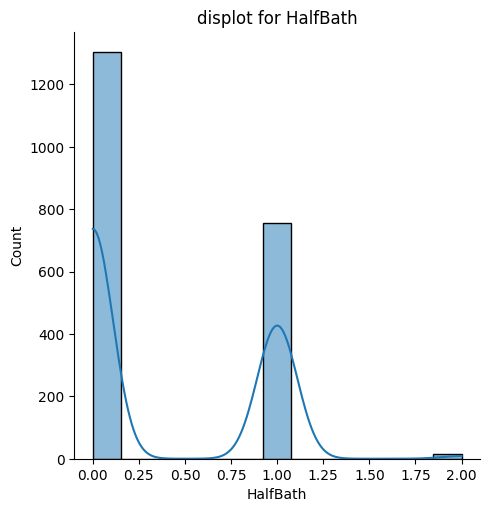

<Figure size 500x500 with 0 Axes>

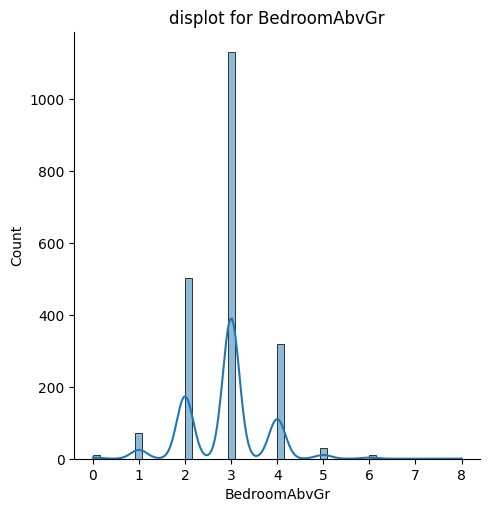

<Figure size 500x500 with 0 Axes>

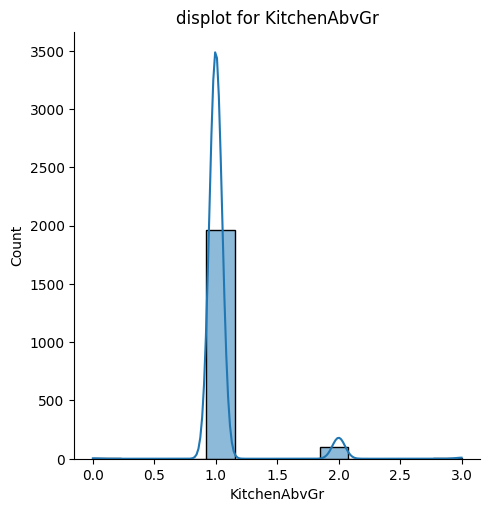

<Figure size 500x500 with 0 Axes>

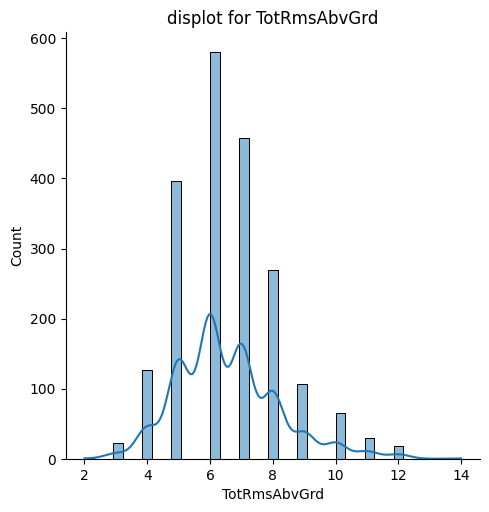

<Figure size 500x500 with 0 Axes>

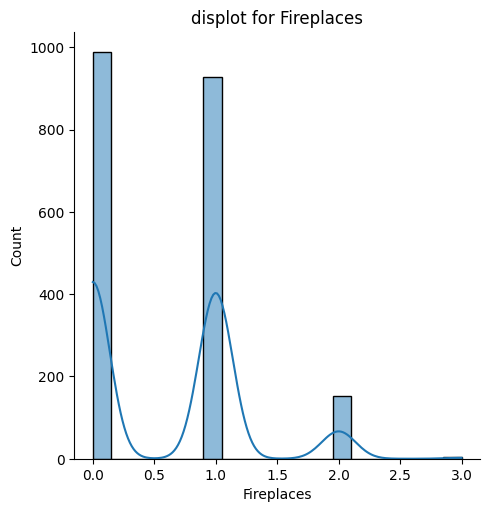

<Figure size 500x500 with 0 Axes>

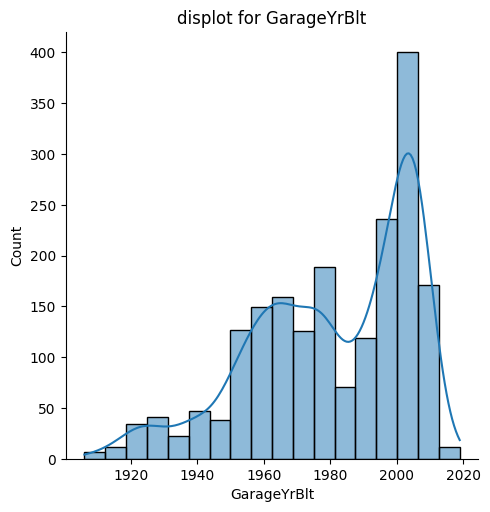

<Figure size 500x500 with 0 Axes>

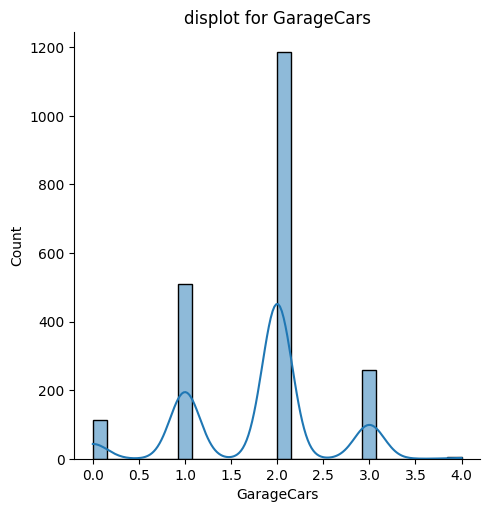

<Figure size 500x500 with 0 Axes>

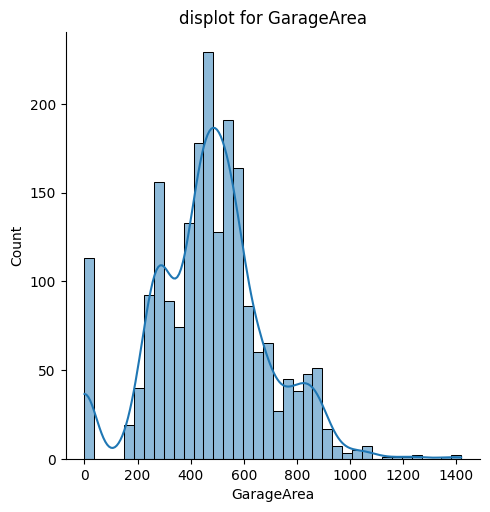

<Figure size 500x500 with 0 Axes>

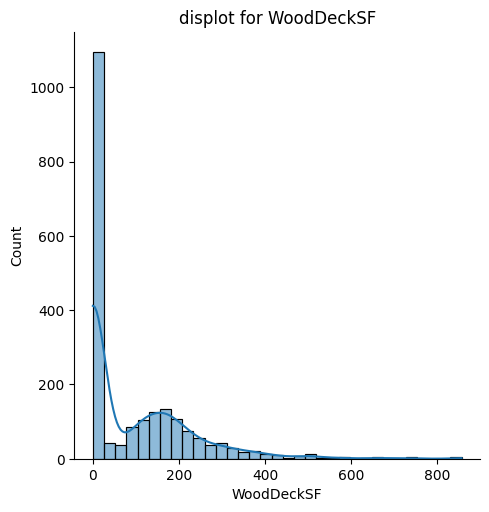

<Figure size 500x500 with 0 Axes>

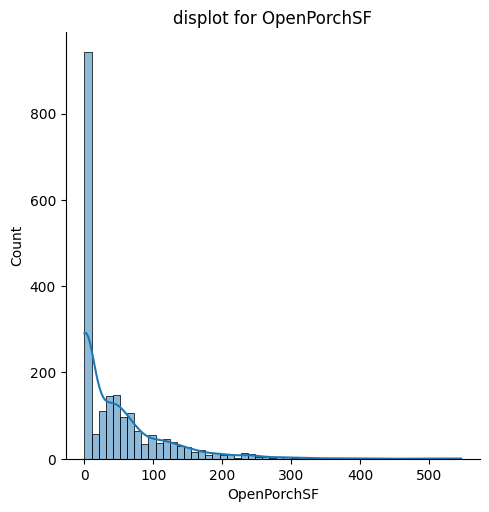

<Figure size 500x500 with 0 Axes>

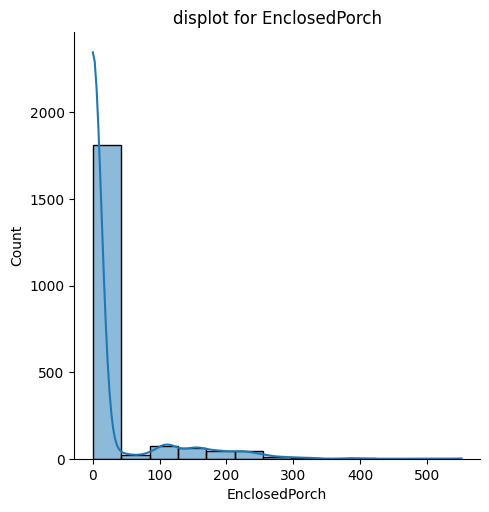

<Figure size 500x500 with 0 Axes>

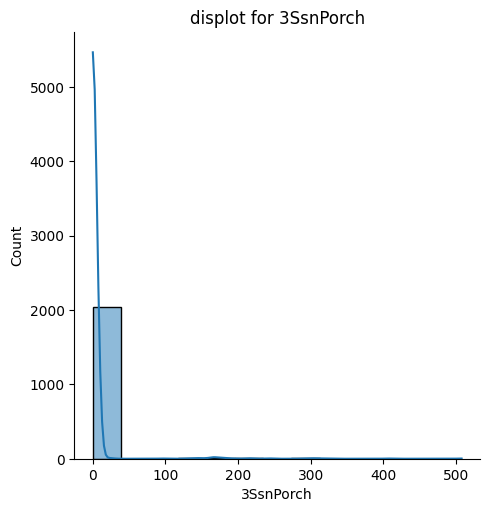

<Figure size 500x500 with 0 Axes>

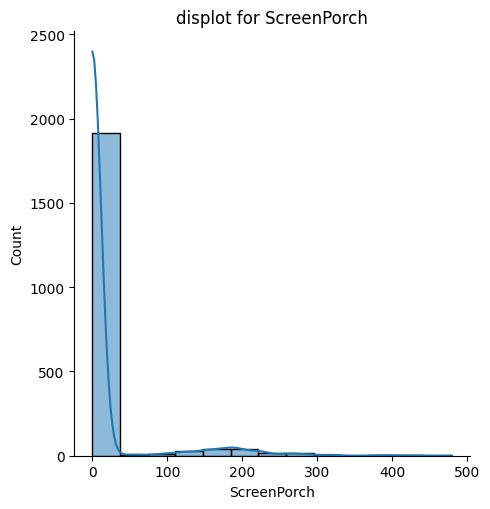

<Figure size 500x500 with 0 Axes>

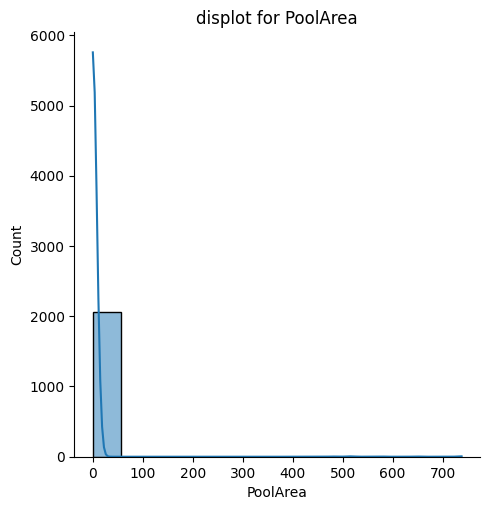

<Figure size 500x500 with 0 Axes>

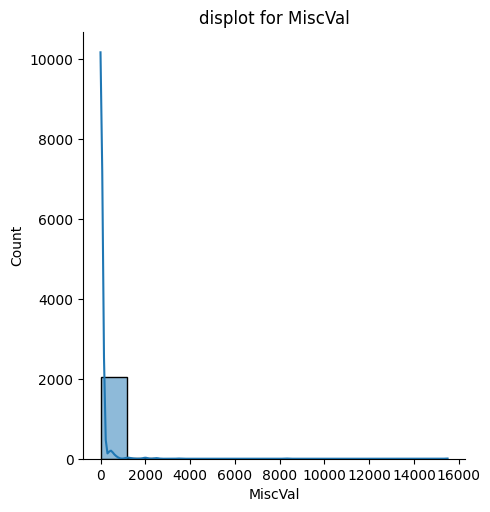

<Figure size 500x500 with 0 Axes>

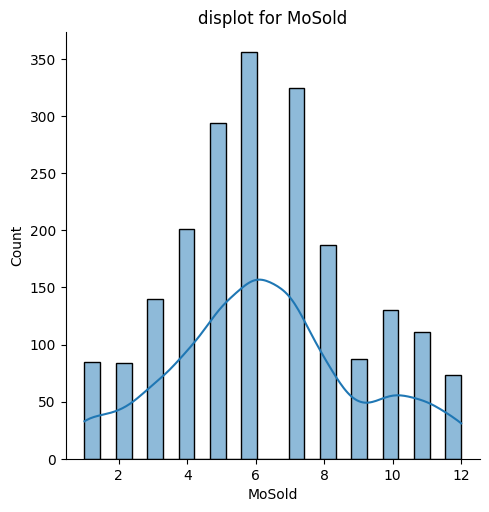

<Figure size 500x500 with 0 Axes>

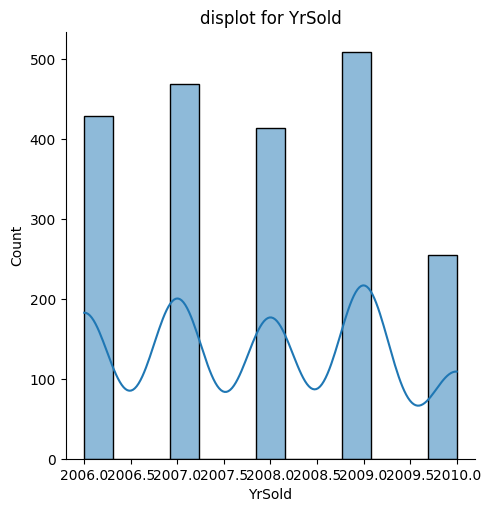

<Figure size 500x500 with 0 Axes>

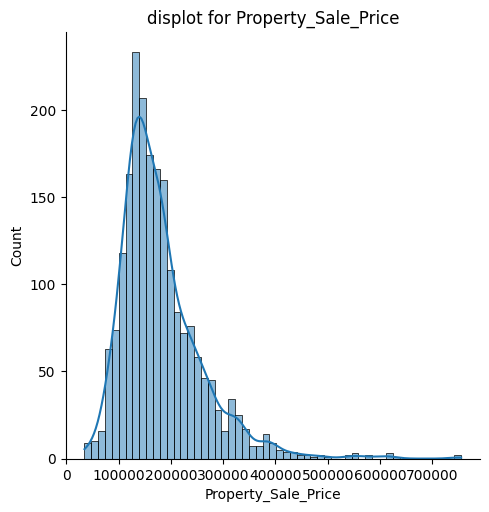

In [135]:
for i in numerical_columns:
    plt.figure(figsize=(5,5))
    sns.displot(numerical_columns[i] , kde = True)
    plt.title(f"displot for {i}")

<Axes: >

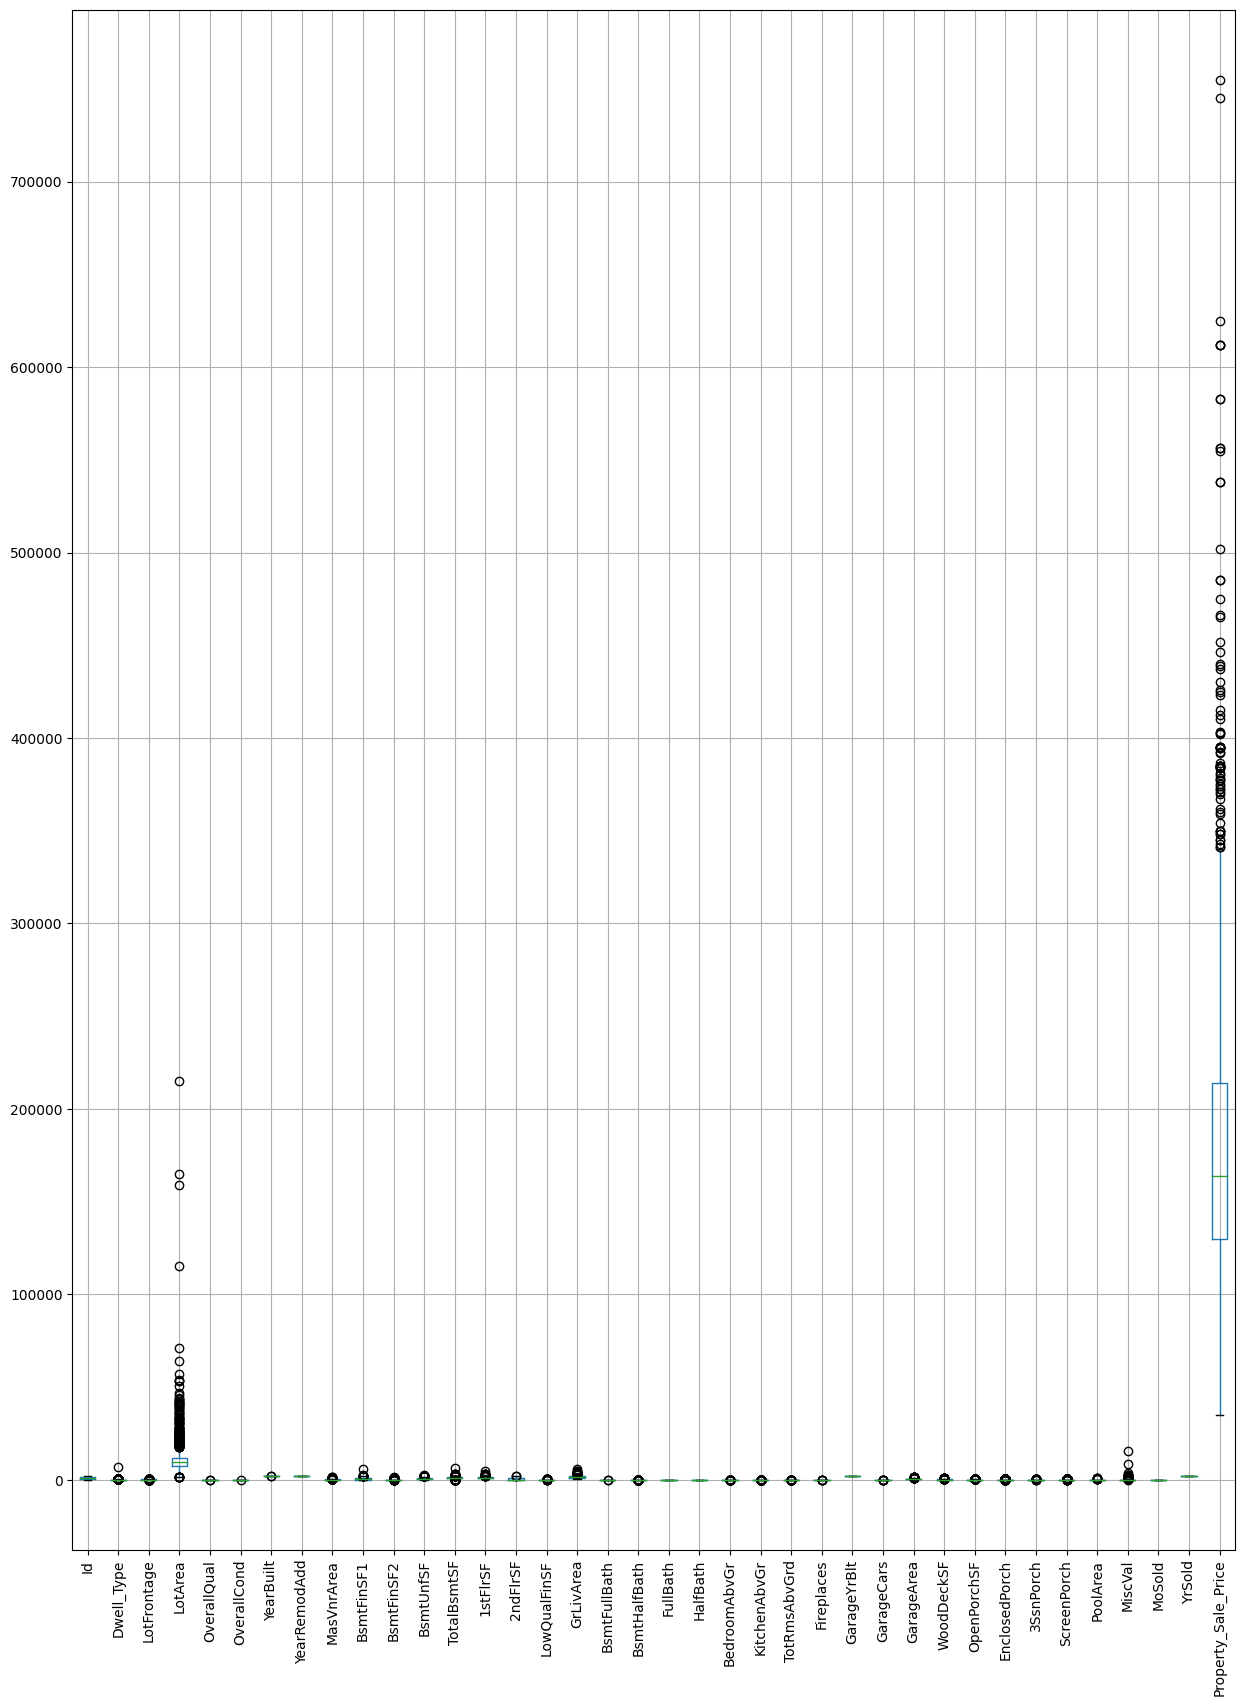

In [138]:
numerical_columns.boxplot(rot=90,figsize=(15,20))

## Bi-Variate Analysis

<Axes: >

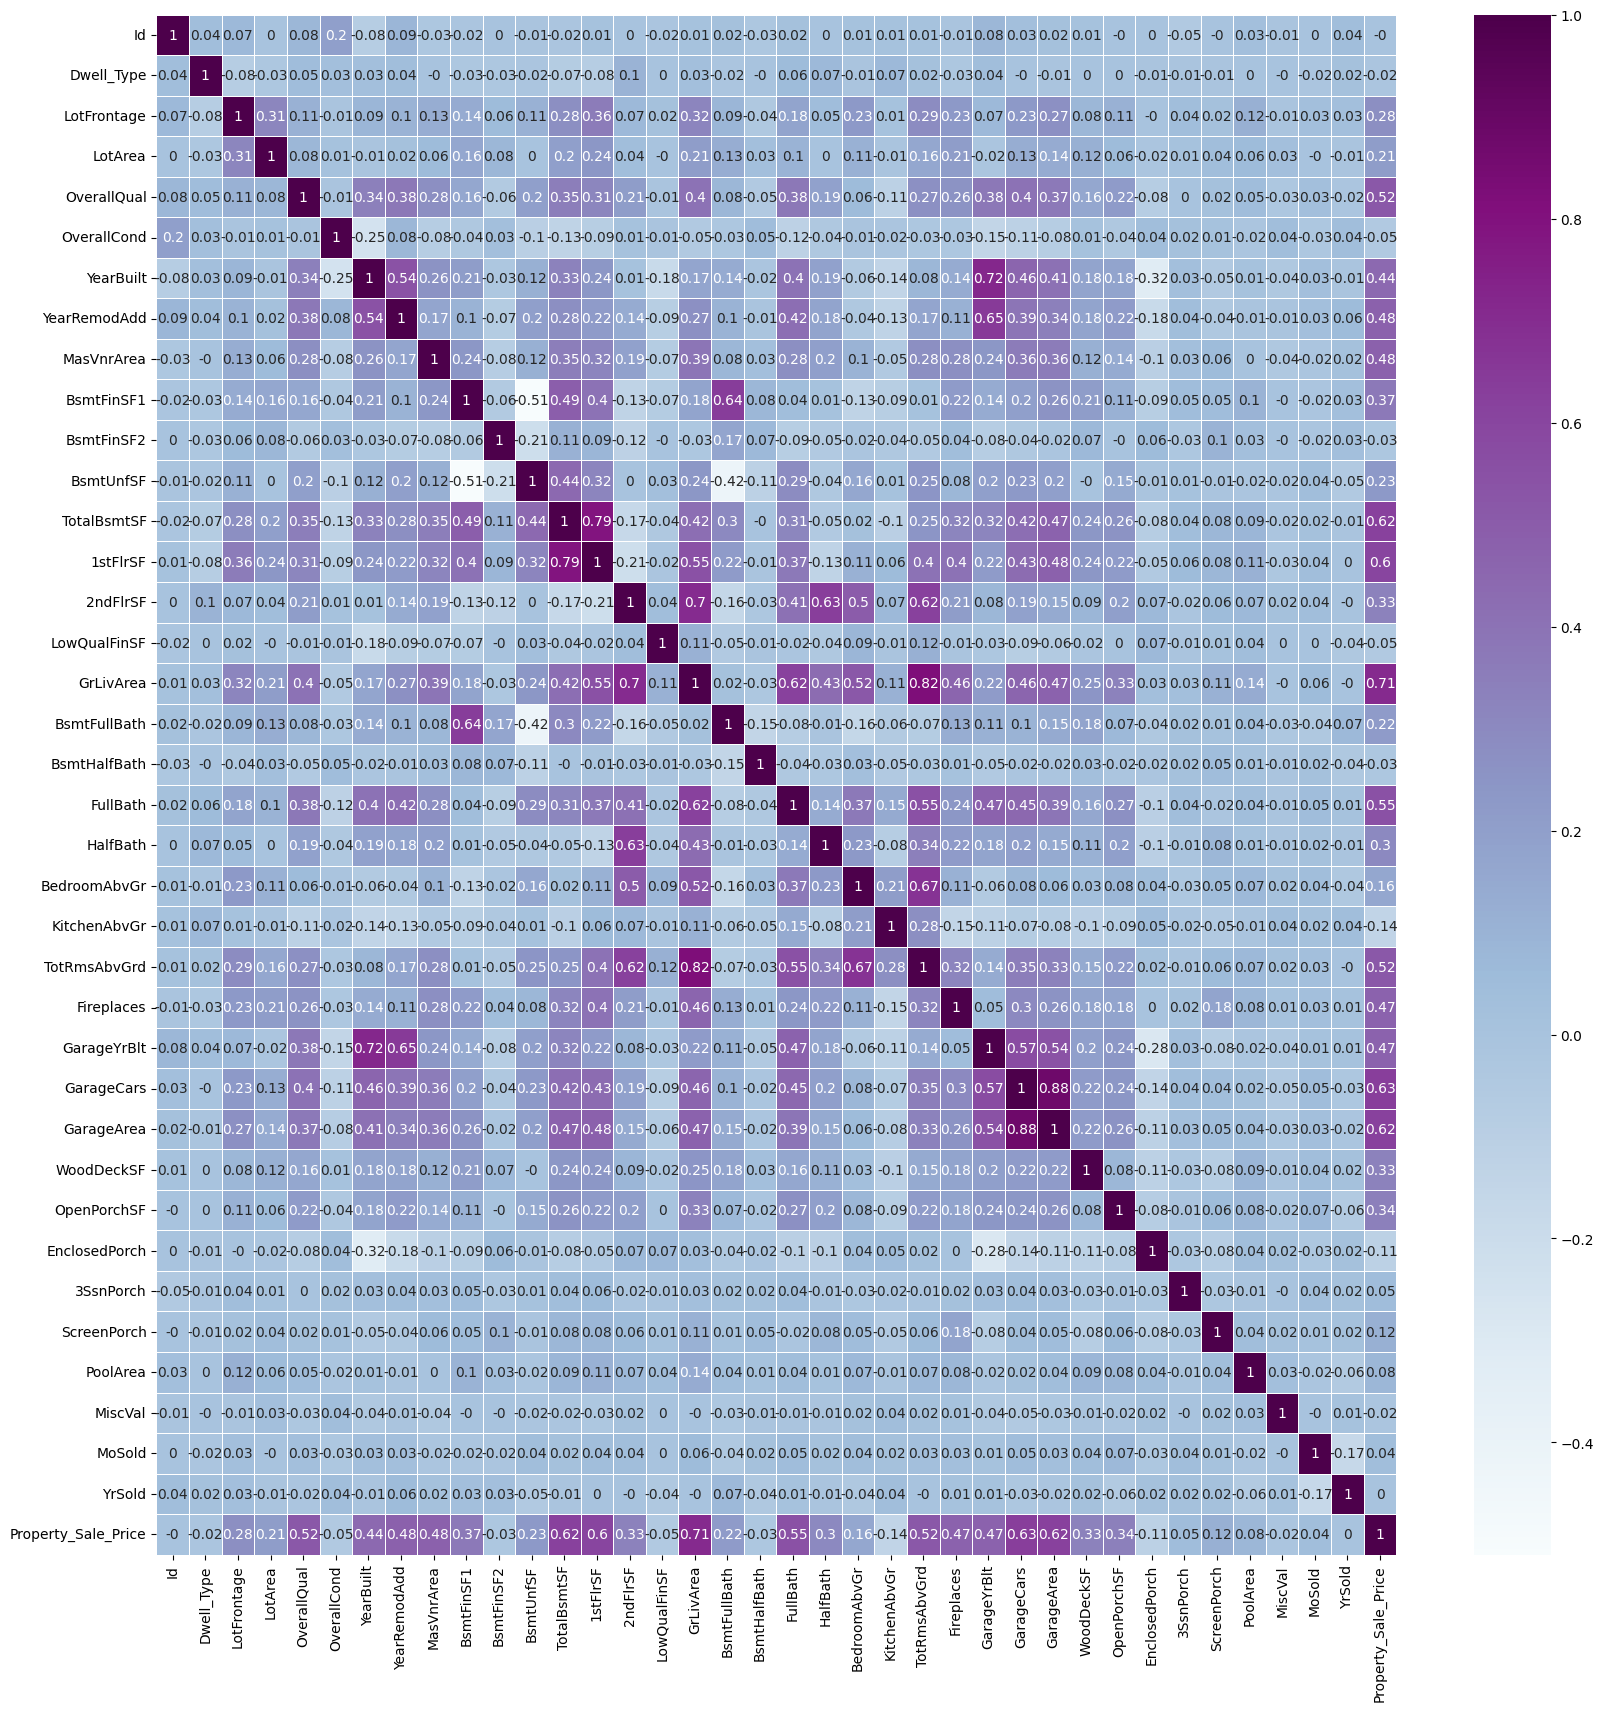

In [144]:
plt.figure(figsize = (20,20))
sns.heatmap(round(numerical_columns.corr(),2),annot=True , linewidths=.5 , cmap = 'BuPu')

In [145]:
def display_low_correlation_with_target(data, target_column, threshold=0.3):

    # Calculate correlations
    correlations = dataset.corr()[target_column]

    # Filter columns based on the threshold
    low_corr_columns = correlations[(correlations < threshold) & (correlations > -threshold)].index.tolist()

    # Display the columns
    print(f"Columns with correlation less than {threshold} and greater than {-threshold} with the target column '{target_column}':")
    print(low_corr_columns)

    return low_corr_columns

low_corr_columns = display_low_correlation_with_target(dataset, 'Property_Sale_Price', threshold=0.2)

Columns with correlation less than 0.2 and greater than -0.2 with the target column 'Property_Sale_Price':
['Zone_Class', 'Road_Type', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'BedroomAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'SaleType']


In [146]:
def corr_with_column(data,target_col,columns_of_interest):
    correlations = data[columns_of_interest].corrwith(data[target_col])
    print(f"correlation for {'target_col'} and specified columns")
    return correlations

In [147]:
corr_with_column(dataset,'Property_Sale_Price',low_corr_columns)

correlation for target_col and specified columns


Zone_Class      -0.168772
Road_Type        0.054667
LandContour      0.027606
Utilities       -0.021040
LotConfig       -0.061008
LandSlope        0.038989
Neighborhood     0.199664
Condition1       0.092759
Condition2       0.004434
Dwelling_Type   -0.083826
HouseStyle       0.176854
RoofMatl         0.145356
Exterior1st      0.117839
Exterior2nd      0.110669
ExterCond        0.095955
BsmtCond         0.031470
BsmtFinType1    -0.080067
BsmtFinType2     0.046532
Heating         -0.107264
BedroomAbvGr     0.160748
Functional       0.115320
GarageQual       0.103018
GarageCond       0.135357
SaleType        -0.060839
dtype: float64

In [148]:
len(dataset.columns)

62

# Splitting of Data

In [149]:
x = dataset.drop(['Property_Sale_Price'],axis=1)
y = dataset['Property_Sale_Price']

In [150]:
print(y.shape)
print(x.shape)

(2073,)
(2073, 61)


In [151]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state =42)

In [152]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1658, 61)
(415, 61)
(1658,)
(415,)


# Model Evaluation Function

In [153]:
def model_eval_train(actual , predicted):
  rmse_train =np.sqrt( mean_squared_error(actual , predicted))
  r2_score_train = (r2_score(actual , predicted))
  print("The RMSE for the train dataset :" ,round(rmse_train ,2))
  print("The R2 score for the train dataset:" , round(r2_score_train, 2))

def model_eval_test(actual , predicted):
  rmse_test = np.sqrt( mean_squared_error(actual , predicted))
  r2_score_test = (r2_score(actual , predicted))
  print("The RMSE for the test dataset :" , round(rmse_test,2))
  print("The R2 score for the test dataset:" , round(r2_score_test,2))

# Linear Regression Model

In [154]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [155]:
print(lr.coef_)

[-1.11351850e+03 -1.32532646e+02  2.05266707e-01  3.52877214e+04
 -1.38211581e+03  2.25301397e+03 -3.11493722e+04  6.22645818e+02
  8.39087168e+03  5.92854010e+02  1.29606024e+02 -1.37045402e+04
 -6.11277170e+03 -1.49285956e+03  2.61949136e+03  3.47486397e+01
  1.34981677e+02  2.63260034e+03  7.99200997e+03 -2.15500304e+03
  1.60311486e+03  6.15639548e+03  4.02153229e+01 -1.36526035e+04
  4.54576335e+02  2.42733087e+03 -9.73288752e+03  2.08314134e+03
 -3.69362176e+03 -9.55463598e+02 -3.95210705e+00  1.11216560e+03
 -1.10165617e+01  2.79668398e+01 -5.61642022e+03 -1.23365791e+03
  8.76262460e+03  8.92860447e+02  4.64436769e+01  5.06008108e+01
 -9.65119016e+00  5.37172301e+03  6.27195084e+03  4.31303856e+03
 -4.22800807e+03 -1.04270559e+04  3.63185307e+03  4.68409653e+03
  7.64771897e+03 -5.59719111e+01 -1.06380194e+02 -1.47011780e+03
  1.07424726e+04  1.58445858e+00  8.21716039e+02  3.48310800e+03
  1.52229687e+03  1.75177356e+01 -3.36508191e-01 -1.20365661e+03
  4.06993422e+03]


In [156]:
print(lr.intercept_)

-92071.52584478943


In [157]:
y_hat_train_lr = lr.predict(X_train)
y_hat_test_lr = lr.predict(X_test)

In [158]:
y_hat_train_lr

array([244110.99246393, 127653.33775965, 149372.99625422, ...,
       174857.24838692, 103689.14447895, 168044.26242949])

In [159]:
model_eval_train(y_train , y_hat_train_lr)
print("\n")
model_eval_test(y_test , y_hat_test_lr)

The RMSE for the train dataset : 31155.69
The R2 score for the train dataset: 0.84


The RMSE for the test dataset : 31601.45
The R2 score for the test dataset: 0.83


# Decision Tree Regressor

In [160]:
dtree = DecisionTreeRegressor( )

#fit The Model
dtree.fit(X_train , y_train)

DecisionTreeRegressor()

In [161]:
y_hat_train_dtree = dtree.predict(X_train)
y_hat_test_dtree = dtree.predict(X_test)

In [162]:
model_eval_train(y_train , y_hat_train_dtree)
print("\n")
model_eval_test(y_test , y_hat_test_dtree)

The RMSE for the train dataset : 0.0
The R2 score for the train dataset: 1.0


The RMSE for the test dataset : 39618.66
The R2 score for the test dataset: 0.73


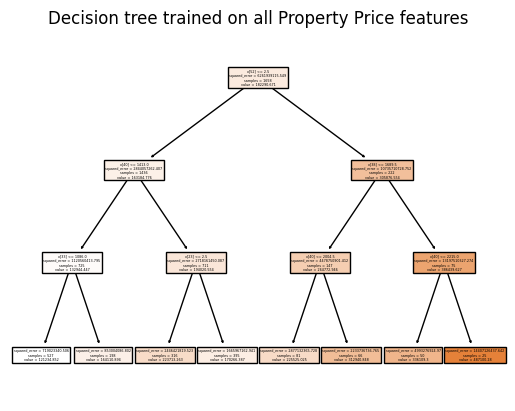

In [163]:
plt.figure()
clf = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all Property Price features")
plt.show()

In [164]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
GarageCars,3.771266e-01
GrLivArea,2.246055e-01
1stFlrSF,7.912720e-02
ExterQual,5.523072e-02
TotalBsmtSF,3.419969e-02
...,...
MasVnrType,3.203852e-07
RoofMatl,6.421188e-08
Condition2,0.000000e+00
Utilities,0.000000e+00


# Random Forest Regressor

In [165]:
rf = RandomForestRegressor()

#Fit the Model
rf.fit(X_train , y_train)

RandomForestRegressor()

In [166]:
y_hat_train_rf = rf.predict(X_train)
y_hat_test_rf = rf.predict(X_test)

In [167]:
model_eval_train(y_train , y_hat_train_rf)
print('\n')
model_eval_test(y_test , y_hat_test_rf)

The RMSE for the train dataset : 9773.57
The R2 score for the train dataset: 0.98


The RMSE for the test dataset : 23423.25
The R2 score for the test dataset: 0.91


# Principal Component Analysis - Dimensionality Reduction

In [168]:
pca = PCA(n_components = X_train.shape[1])
pca.fit(X_train)

PCA(n_components=61)

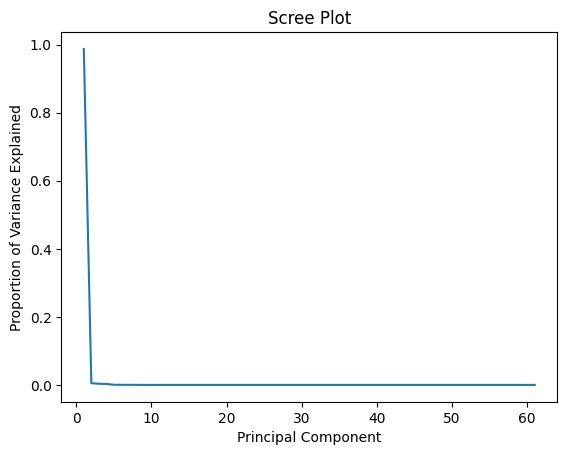

In [169]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot")
plt.show()

In [170]:
pca2 = PCA(n_components = 30)
pca2.fit(X_train)

PCA(n_components=30)

In [171]:
x_train_pca = pca2.fit_transform(X_train)
x_test_pca = pca2.fit_transform(X_test)

In [172]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(1658, 30)
(415, 30)


## Updated Linear Regression

In [173]:
lr = LinearRegression()
lr.fit(x_train_pca , y_train)

LinearRegression()

In [174]:
y_hat_train_lr_pca = lr.predict(x_train_pca)
y_hat_test_lr_pca = lr.predict(x_test_pca)

In [175]:
model_eval_train(y_train , y_hat_train_lr_pca)
print("\n")
model_eval_test(y_test , y_hat_test_lr_pca)

The RMSE for the train dataset : 36148.05
The R2 score for the train dataset: 0.79


The RMSE for the test dataset : 51138.83
The R2 score for the test dataset: 0.55


## Updated Decision Tree

In [176]:
dtree = DecisionTreeRegressor( )

#fit The Model
dtree.fit(x_train_pca , y_train)

DecisionTreeRegressor()

In [177]:
y_hat_train_dtree_pca = dtree.predict(x_train_pca)
y_hat_test_dtree_pca = dtree.predict(x_test_pca)

In [178]:
model_eval_train(y_train , y_hat_train_dtree_pca)
print("\n")
model_eval_test(y_test , y_hat_test_dtree_pca)

The RMSE for the train dataset : 0.0
The R2 score for the train dataset: 1.0


The RMSE for the test dataset : 64229.81
The R2 score for the test dataset: 0.29


## Updated Random Forest

In [179]:
rf = RandomForestRegressor()

#Fit the Model
rf.fit(x_train_pca, y_train)

RandomForestRegressor()

In [180]:
y_hat_train_rf_pca = rf.predict(x_train_pca)
y_hat_test_rf_pca = rf.predict(x_test_pca)

In [181]:
model_eval_train(y_train , y_hat_train_rf_pca)
print('\n')
model_eval_test(y_test , y_hat_test_rf_pca)

The RMSE for the train dataset : 11392.22
The R2 score for the train dataset: 0.98


The RMSE for the test dataset : 45357.92
The R2 score for the test dataset: 0.65
